@ C. Giuppone . Reduccion de datos para detectar binarias . Masa 13/6. (Mp,e,w,t0,z0,P,t)
mass(Mj),e,w(rad),t0(jd),z0(s),P(y),t(jd)

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import rebound
from math import *    #importa todas las operaciones matemáticas de math (sin, cos, tan, sqrt, pi, etc)

In [2]:
#anomalía eccéntrica
def ae(e,M):
    E = M #Valor inicial para iteración
    i = 0
    while True:
        E0 = E
        E = M + e*np.sin(E0)
        i = i+1
        D = (E-E0).astype('float')
        if (abs(D)<0.0001):
            return E
            break
#Anomalía verdadera:  Tan(F/2) = ee*Tan(E/2) #giuppone
def F(e,M):
    ee=np.sqrt((1+e)/(1-e))
    
    ss = sqrt(1. + e)*sin(ae(e,M)/2.)
    cs = sqrt(1. - e)*cos(ae(e,M)/2.)
    F   = 2*atan2(ss,cs)   #anomalía verdadera en cuadrante correcto
    return F            

Constantes

In [3]:
# https://www.iau.org/public/themes/measuring/ 
uam     = 1.495978707e11
c       = 2.99792458e8/uam #m/s/uam == ua/s
twopi   = pi*2
dy     = 365.25
k      = 1.720209895e-02
G      = k*k
mearth = 3.04043e-6       # earth mass in solar masses
mjup   = 9.54792e-4       #pup in solar masses
rad    = twopi/360.0

In [43]:
def Deltat(Prot, M, R, L, a, T):
    alpha = 0.1 
    beta = 0.1
    k = 2.172e-4 * sqrt(alpha) * sqrt(beta)
    Psun = 28.5
    Omega_sun= 2*pi/Psun 
    Omega= 2*pi/Prot/Omega_sun #omega_days   
    #omega in omega_sun, m=msun
    #T year # r=rsun, #l=sun, 
    
    dt = k*Omega*M**(-1.5)*R**4*L**0.5*a**(-2)*T**(1.5)
    
    return dt

def DOdo(Prot, M, R, L, a, T):
    
    Dp_p  = 2*pi*Deltat(Prot, M, R, L, a, T)/2. / (T*365.25*24*60*60)
    
    Rau   = R*0.00465047
#    Dp_p  = 2*pi* Deltat(Prot, M, R, L, a, T) / (T*1.0) #eq 38 Applegate
    Ms    = 0.1*M #Applegate
    
    dom_om= G*M/3./Rau**3 * (a/Rau)**2 * (P/2/pi)**2 * Dp_p * M/Ms  #eq 29 Applegate
    print (Dp_p,dom_om)    
    return dom_om

def B(Prot, M, R, L, a, T): #eq33 y 38 Applegate
    Pmod  = T*365.25*24*60*60  #modulation period = 2*pi/nu 
    Dp_p  = 2*pi*Deltat(Prot, M, R, L, a, T)/2. / (T*365.25*24*60*60)
    B2 = 10*G*M**2/R**4*(a/R)**2*Dp_p
    return sqrt(B2)


In [112]:
# Wasp19
Prot=10.5
M = 0.96
Ms = 0.1*M
#T = 11*365.25 # VER
a = 0.0164
R = 0.94
L = 0.73
Porb = 0.788*24*60*60

# print (Deltat(Prot, M, R, L, a, 11)/2., Deltat(Prot, M, R, L, a, 11)/2./(11*365.25*24*60*60))
# print (Deltat(Prot, M, R, L, a, 22)/2., Deltat(Prot, M, R, L, a, 22)/2./(22*365.25*24*60*60))
# print (Deltat(Prot, M, R, L, a, 50)/2., Deltat(Prot, M, R, L, a, 50)/2./(50*365.25*24*60*60))

# dp_p = 2*pi*Deltat(Prot, M, R, L, a, 50)/2. / (50*365.25*24*60*60)
T=11
Dp_p  = 2*pi*Deltat(Prot, M, R, L, a, T)/2. / (T*365.25*24*60*60)    
Rau   = R*0.00465047
Ms    = 0.1*M #Applegate
dom_om= G*M/3./Rau**3 * (a/Rau)**2 * (P/2/pi)**2 * Dp_p * M/Ms
# print (DOdo(Prot, M, R, L, a, 11))
# print (DOdo(Prot, M, R, L, a, 22))
# print (DOdo(Prot, M, R, L, a, 50))

dP = Deltat(Prot, M, R, L, a, T)/2.
dJ = -G*M**2/Rau * (a/Rau)**2 * (dP/6/pi) 
Is = 2/3*(0.1*M)
Dom= dJ/Is 
Dom_om = Dom / (2*pi/(Porb))
Pmod  = T*365.25*24*60*60  #modulation period = 2*pi/nu 
Dp_p  = 2*pi*Deltat(Prot, M, R, L, a, T)/2. / (T*365.25*24*60*60)
B2 = 10*G*M**2/Rau**4*(a/Rau)**2*Dp_p

Om = Dom/1.9e-4
print (Dom,Om,2*pi/Om)
# Dom11=Dom
# print (Dp_p,Deltat(Prot, M, R, L, a, T)/2., Dom, Dom/2. , Dom_om, Prot)


T=22
Dp_p  = 2*pi*Deltat(Prot, M, R, L, a, T)/2. / (T*365.25*24*60*60)    
dP    = Deltat(Prot, M, R, L, a, T)/2.
dJ    = -G*M**2/Rau * (a/Rau)**2 * (dP/6/pi) 
Is    = 2/3*(0.1*M)
Dom   = dJ/Is 
Dom_om= Dom / (2*pi/(Porb))
Dp_p  = 2*pi*Deltat(Prot, M, R, L, a, T)/2. / (T*365.25*24*60*60)

Om = Dom/2.7e-4
print (Dom,Om,2*pi/Om)

T=50
Dp_p  = 2*pi*Deltat(Prot, M, R, L, a, T)/2. / (T*365.25*24*60*60)    
dP    = Deltat(Prot, M, R, L, a, T)/2.
dJ    = -G*M**2/Rau * (a/Rau)**2 * (dP/6/pi) 
Is    = 2/3*(0.1*M)
Dom   = dJ/Is 
Dom_om= Dom / (2*pi/(Porb))
Dp_p  = 2*pi*Deltat(Prot, M, R, L, a, T)/2. / (T*365.25*24*60*60)

Om = Dom/4.1e-4
print (Dom,Om,2*pi/Om)
# #B2 = 10*G*M**2/Rau**4*(a/Rau)**2*Dp_p    
# print (Dp_p,Deltat(Prot, M, R, L, a, T)/2., Dom, Dom/2., Dom_om, Prot)

-0.00046551469971228403 -2.450077366906758 -2.564484449367473
-0.0013166744036343014 -4.876571865312227 -1.2884430868071086
-0.004511275793305719 -11.00311169098956 -0.5710371287355814


In [115]:
# Algol , activa estrella B
M=0.8*1.989e33  #g
Ms=0.1 *M
R=3.5*6.957e10  #cm
L=7  *4e33  #egs/s
a=4*R
Porb=2.87 
Rau=R*0.00465047 
Rau=R
dP = 4 #4s
G  = 6.6743e-8 #cm3 g-1 s-2
Dp_p = 1.6e-5
P    = 32*365.25*24*60*60 # y to s

dJ = -G*M**2/Rau * (a/Rau)**2 * (dP/6/pi) 
Is = 2/3*(0.1*M)*R**2
dIeff = Is
Om    = 6e43/dJ
print (dJ*dJ/dIeff,P)
dom   = dJ/Is 

dom_om=  G*M/3./Rau**3 * (a/Rau)**2 * (P/2/pi)**2 * Dp_p * M/Ms
om    = 2*pi/(Porb*24*60*60)
print (dom_om, dom, dom/om)

8.82824806085932e+41 1009843200.0
162153.83163072437 -3.746540749668106e-07 -0.014785847801626001


In [119]:
# SS Cam
OC  = 0.1
Pmod= 2e4
Dp_p= OC/Pmod

M=2.2*1.989e33  #g
Ms=0.1 *M
R  =7*6.957e10  #cm
Rau=R
L=23  *4e33  #egs/s
a=2.7*R
Porb=4.8 
dP = 13 #13s
G  = 6.6743e-8 #cm3 g-1 s-2

#P    = 32*365.25*24*60*60 # y to s

dJ = -G*M**2/Rau * (a/Rau)**2 * (dP/6/pi) 
Is = 2/3*(0.1*M)*R**2
dIeff = Is
Om    = 6e43/dJ
print (dJ,Is,P)
dom   = dJ/Is 

dom_om=  G*M/3./Rau**3 * (a/Rau)**2 * (P/2/pi)**2 * Dp_p * M/Ms
om    = 2*pi/(Porb*24*60*60)
print (dom_om, dom, dom/om)

-1.3193814255551246e+49 6.918409935637202e+55 1009843200.0
7936.472020549187 -1.9070587574738824e-07 -0.012587491363589717


In [125]:
# Wasp19b
M=0.96*1.989e33  #g
Ms=0.1 *M
R  =0.94*6.957e10  #cm
Rau=R
L=0.73  *4e33  #egs/s
a=0.0164*1.496e+13 #cm
Porb=0.788
Prot=10.5
dP = 2.8 #13s
G  = 6.6743e-8 #cm3 g-1 s-2

#P    = 32*365.25*24*60*60 # y to s

dJ = -G*M**2/Rau * (a/Rau)**2 * (dP/6/pi) 
Is = 2/3*(0.1*M)*R**2
dIeff = Is
print (dJ,Is,P)
dom   = dJ/Is 

# dom_om=  G*M/3./Rau**3 * (a/Rau)**2 * (P/2/pi)**2 * Dp_p * M/Ms
om    = 2*pi/(Porb*24*60*60)
print (dom, dom/om)
Om = dom/1.9e-4
print (Dom,Om,2*pi/Om/(24*60*60.))

-7.77993514295787e+48 5.443954302749415e+53 1009843200.0
-1.4290963351820738e-05 -0.15485370373573037
-0.004511275793305719 -0.07521559658853019 -0.0009668480403640108


In [21]:
# OGLE2-TR-L9b
Prot=2.0
M   =1.52
R   =1.53
L   = 4.86
Porb= 2.4855
a   = 0.0308
#  38.1
#  107.8
#  369.4 
print (Deltat(Prot, M, R, L, a, 11)/2.)
print (Deltat(Prot, M, R, L, a, 22)/2.)
print (Deltat(Prot, M, R, L, a, 50)/2.)    

38.36637437844782
108.51649397016907
371.80629552057337


In [ ]:
print

DATOS

Dibujar juntos los datos de los tiempos de tránsito de QS-vir

In [26]:
data =np.loadtxt('qsvir.dat',usecols=(1,2,3))
t = data[:,0]   #time
ti   = t[0]
tr   = t-t[0]  #gave time with respect to first observation
taur  = data[:,1]
etaur = data[:,2]

In [43]:
def tau(Mp,e,w,t0,z0,P,t):  #P in years #z0 in secs #Mp enters in jupiter masses
    n    = 2*pi/(P*365.25)
    Mpj  = Mp*mjup
    ainc = (G*(Mpj+Me)/n**2)**(1./3.)    #CG
    M    = n*(t-t0)
    f    = F(e,M)
    
#     print ("Mpj,ainc,Mp")
#     print (Mpj,ainc,Mp)
    
#     r     = a*(1-e**2)/(1+e*cos(f))
#     zrel  = r*sin(inc)*sin(w+f)+z0
#     zab   zrel*Mp/(Me+Mp)
#    z  =a*(1-e**2)/(1+e*cos(f))*sin(inc)*sin(f+w)+z0   #r*sin(inc)*sin(w+f)+z0
    z  = ainc*Mpj/(Me+Mpj)*(1-e**2)/(1+e*cos(f))*sin(f+w) 
    tau=z/c+z0
    return tau

Dibujar ambas curvas

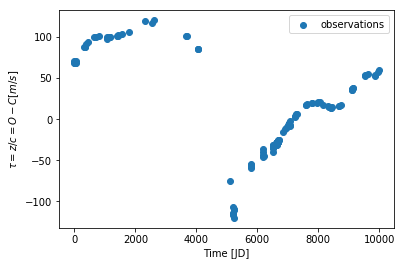

In [44]:
#plt.scatter(times,z[1]/c*mp/(m0+m1+mp), label='n-body')
plt.scatter(tr,taur, label='observations')
#plt.plot(times*1.3,(z[1]/c*mp/(m0+m1+mp))*1.5-90, label='n-body corrected')
#plt.xlim(0,7000)
plt.xlabel('Time [JD]')
#plt.ylim(-30,141)
plt.ylabel(r'$\tau=z/c = O-C [m/s]$')
plt.legend()
plt.show()


In [45]:
#Construct syntethic curves
def synt(Params):    #genera una curva de "z" con params
    Mp,e,w,t0,z0,P = Params
#    n    = 2*pi/(P*365.25)
#    Mpj  = Mp*mjup
#    ainc = (G*(Mpj+Me)/n**2)**(1./3.)
    Zsy =[]   #velocidad radial sintética (genero una curva continua sin errores)
    Tsy =[]
    nf=1000
    delta=max(t)-min(t)
    ij=0
#    print (min(t),delta)
    while ij < nf:
        tsy=min(t)+delta*ij/nf
        Zsy.append(tau(Mp,e,w,t0,z0,P,tsy))
        Tsy.append(tsy)
        ij = ij+1
#        print (tsy,ij)       
    return Tsy,Zsy   

def OC(Params):    #genera una curva de velocidad radial con params
    Mp,e,w,t0,z0,P = Params
    BOC   =[]
    TOC   =[] 
    ij=0
    while ij < len(t):
        BOC.append(tau(Mp,e,w,t0,z0,P,t=t[ij]))
        TOC.append(t[ij])
        ij = ij+1
    return TOC,BOC    

In [46]:
#Generate synt
m0=0.78
m1=0.43
Me=m0+m1

Mp=52.7  #0.05033
pp=18.96   #years
ainc = 7.1 #au
ep=0.95
w = 206*rad
T0 =2453831-(2400000)
z0 = 0. 
print(T0,t[0],min(t))

53831 48715.419887605 48715.419887605


In [47]:
print (Mp,ep,w,z0,pp)
print (tau(Mp,ep,w,54000.,z0,pp,57000.))

52.7 0.95 3.595378259108319 0.0 18.96
120.03589182302451


In [48]:
#ainc,e,w,t0,z0,P 
Params = Mp,ep,w,T0,z0,pp
tsy0,zsy0 = synt(Params)
Params = Mp,ep,w,57000.,z0,pp
tsy1,zsy1 = synt(Params)
Params = Mp,ep,w,T0,-10,pp
tsy2,zsy2 = synt(Params)
Params = 15.,ep,w,T0,z0,pp
tsy3,zsy3 = synt(Params)

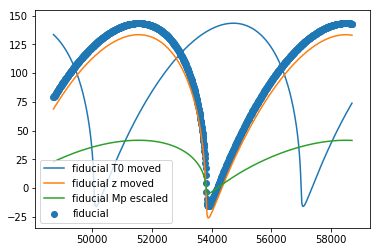

In [49]:
#the amplitude does not change with T0
plt.plot(tsy1,zsy1, label='fiducial T0 moved')
plt.plot(tsy2,zsy2, label='fiducial z moved')
plt.plot(tsy3,zsy3, label='fiducial Mp escaled')
plt.scatter(tsy0,zsy0, label='fiducial')
plt.legend()

Maximal amplitude of TVE signal (see Woltjer 1922) <br>
$z1-z2=a sin(inc) sin (u1)=a \sin(inc) \sqrt{1-e^2 cos^2(w)}$

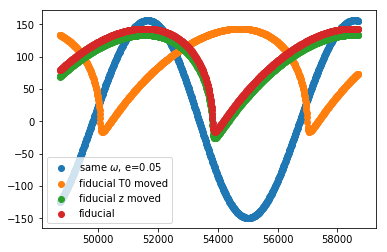

In [50]:
#comparar con las mismas masas y ainc, pero cambiando a la región con mayor amplitud (e~0, w=206).
# con esto nos damos cuenta cual es la región de maxima amplitud.
#major amplitude
Params = Mp,0.05,206*rad,T0,0.,pp
tsy3,zsy3 = synt(Params)
plt.scatter(tsy3,zsy3, label=r'same $\omega$, e=0.05')
plt.scatter(tsy1,zsy1, label='fiducial T0 moved')
plt.scatter(tsy2,zsy2, label='fiducial z moved')
plt.scatter(tsy0,zsy0, label='fiducial')
plt.legend()

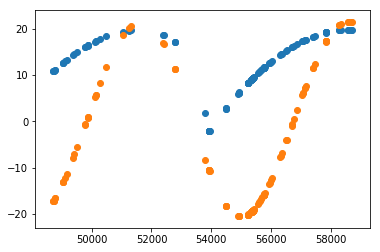

In [51]:
Params = ainc,0.95,206*rad,T0,0.,pp
toc0,zoc0  = OC(Params)
Params = ainc,0.05,206*rad,T0,0.,pp
toc1,zoc1  = OC(Params)
plt.scatter(toc0,zoc0)
plt.scatter(toc1,zoc1)

In [52]:
#Defino una WRMS que dependa de una sóla variable (que será un arreglo) (así funciona el minimizador)
#Los DATOS que tengo son: t, taur, etaur
#P e t0 w mp v0 = Params
#bounds = ((aincm,aincmax), (emin,emax), (wmin, wmax), (t0min,t0max), (z0min,z0max), (Pmin,Pmax))
def WRMS(Params):

#    print (Params)
#    print (bounds)
    for x,r in zip(Params,bounds):    #el comando junta los datos de Params y bounds
        if x < r[0] or x > r[1]:      #si los params son mayores o menores q los bounds retorna infinito 
      #      print (x,r[0],r[1])
            return np.inf
        
    Mp,e,w,t0,z0,P = Params    #Arreglo a minimizar
    Be=taur
     
#    print(taur[0:2],t[0:2])
    VT=[]
    ij = 0
    while ij<len(Be):
        VT.append(tau(Mp,e,w,t0,z0,P,t=t[ij]))
        ij = ij + 1
        
    N =len(Be)
    err   = etaur #np.sqrt(ei**2+sj**2)
    invS  =np.sum(1./err**2)
    Ab    =invS/N/(N-1.)

    WRMS=Ab*np.sum((( VT - Be)/err)**2.)
    return np.sqrt(WRMS)  

def nWRMS(Params):
    wi=WRMS(Params)
    N =len(taur)
    w2=wi*N*(N-1)
    return -0.5*w2

In [53]:
(max(t)-min(t))/365.25,max(t)-min(t)

(27.353871233722106, 9991.001468117)

In [58]:
Params = Mp,0.95,206*rad,T0,0.,pp
# bounds = ((aincm,aincmax), (emin,emax), (wmin, wmax), (t0min,t0max), (z0min,z0max), (Pmin,Pmax))
Pmin=(t[2]-t[0])/dy
Pmax=(max(t)-min(t))/dy   #in years
t0min = min(t)
t0max = max(t)
z0min = min(taur)
z0max = max(taur)
Mpmin = 0.1  # usar definición del teórico Mjup
Mpmax = 100. # usar definición del teórico Mjup
bounds = (Mpmin,Mpmax), (0,0.99), (0, 2*pi), (t0min,t0max), (z0min,z0max), (Pmin,Pmax)
bounds = (Mpmin,Mpmax), (0,0.99), (0, 2*pi), (t0min,t0max), (z0min,z0max), (15.,30.)
WRMS(Params)

986.0421875918846

In [59]:
%%time
import scipy.optimize as optimize
#Minimize # genetics algorithm. No necesita condicion inicial...sólo bounds!
resultga0 = optimize.differential_evolution(WRMS, bounds, strategy='best1bin', maxiter=95, popsize=80,tol=0.01, mutation=(0.5, 1), recombination=0.7, seed=None, callback=None, disp=True, polish=True, init='latinhypercube', atol=0)   #disp=True si queremos ver como avanza.
resultga0.x

differential_evolution step 1: f(x)= 163.894
differential_evolution step 2: f(x)= 163.894
differential_evolution step 3: f(x)= 163.293
differential_evolution step 4: f(x)= 122.235
differential_evolution step 5: f(x)= 122.235
differential_evolution step 6: f(x)= 122.235
differential_evolution step 7: f(x)= 122.235
differential_evolution step 8: f(x)= 117.536
differential_evolution step 9: f(x)= 117.536
differential_evolution step 10: f(x)= 117.536
differential_evolution step 11: f(x)= 117.536
differential_evolution step 12: f(x)= 103.102
differential_evolution step 13: f(x)= 103.102
differential_evolution step 14: f(x)= 103.102
differential_evolution step 15: f(x)= 101.615
differential_evolution step 16: f(x)= 101.615
differential_evolution step 17: f(x)= 101.615
differential_evolution step 18: f(x)= 101.615
differential_evolution step 19: f(x)= 101.615
differential_evolution step 20: f(x)= 101.615
differential_evolution step 21: f(x)= 101.615
differential_evolution step 22: f(x)= 96.64

array([ 5.10992945e+01,  9.38408444e-01,  3.31497377e+00,  5.34078171e+04,
       -7.52187550e+00,  2.95344310e+01])

In [60]:
print(*Params)
print(*resultga0.x)
print(bounds)   #mi resultado está dando muy cerca de los BOUNDS. Repetir.
f = open("fitsMp.txt", "w")
print(resultga0.fun,resultga0.x[2]/rad)
print ("P ","ainc ", "ainc e w T0 z  P ", "WRMS ","\n",file=f, end=' ', sep=' ')
print (resultga0.x[4],resultga0.x[0],*resultga0.x,resultga0.fun,"\n",file=f, end=' ', sep=' ')
f.close()
print (*resultga0.x)

52.7 0.95 3.595378259108319 53831 0.0 18.96
51.09929453490829 0.9384084436083107 3.3149737702853566 53407.817064955634 -7.521875497943943 29.534431022432884
((0.1, 100.0), (0, 0.99), (0, 6.283185307179586), (48715.419887605, 58706.421355722), (-119.99747701921, 120.19571762066), (15.0, 30.0))
78.30407443230341 189.934006233921
51.09929453490829 0.9384084436083107 3.3149737702853566 53407.817064955634 -7.521875497943943 29.534431022432884


255.6435642835363 263.92124370292134


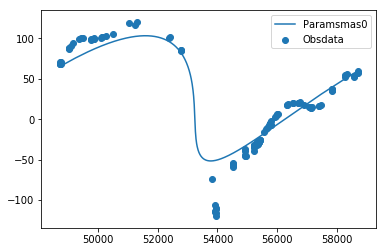

In [64]:
#Paramssol = ainc,e,w,T0,z,P wrms(80.6665)
Paramsma00 = (6.64683762e+01, 9.55424521e-01, 3.24773740e+00, 5.32430641e+04, 6.37917690e-01, 2.79959842e+01) 
Paramsmass= (5.10992945e+01,  9.38408444e-01,  3.31497377e+00,  5.34078171e+04, -7.52187550e+00,  2.95344310e+01)
# Paramsmas0 = (2.20097668e+01,  9.46496830e-01,  3.26382027e+00,  5.32898254e+04, -3.41819332e-01,  2.79891240e+01)
# Paramsmass = (6.64683762e+01, 9.55424521e-01, 3.24773740e+00, 5.32430641e+04, 6.37917690e-01, 2.79959842e+01)
# Paramssol0 = (9.02724903e+00, 9.11372213e-01, 3.23027678e+00, 5.31457517e+04, 1.68270052e+01, 2.73368237e+01)
# Paramssol1 = (9.38302959e+00, 9.32856790e-01, 3.17089423e+00, 5.30599905e+04, 1.66289206e+01, 2.29992555e+01)
# tgam,taugam   = synt(Paramsmass)
# tga ,tauga    = synt(Paramssol0)
# tga1,tauga1   = synt(Paramssol1)
# tgam0,taugam0   = synt(Paramsmas0)
tga00,tauga00   = synt(Paramsma00)
# plt.plot(tgam0,taugam0, label="Paramsmas0")
# plt.plot(tgam,taugam, label="Paramsmass")
# plt.plot(tga ,tauga , label="Paramssol0")
# plt.plot(tga1,tauga1, label="Paramssol1", lw=2)
plt.plot(tga00,tauga00, label="Paramsmas0")
plt.scatter(t,taur, label="Obsdata")
plt.legend()
print (WRMS(Paramssol0),WRMS(Paramssol1))

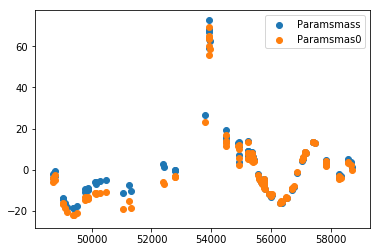

In [30]:
#toc0,zoc0  = OC(Paramssol0)
#toc1,zoc1  = OC(Paramssol1)
tocm,zocm  = OC(Paramsmass)
tocn,zocn  = OC(Paramsmas0)
#plt.scatter(toc0,zoc0-taur, label="Paramssol0")
#plt.scatter(toc1,zoc1-taur, label="Paramssol1")
plt.scatter(tocm,zocm-taur, label="Paramsmass")
plt.scatter(tocn,zocn-taur, label="Paramsmas0")
plt.legend()

In [33]:
#Paramssol = Mp,e,w,T0,z,P
print (resultga0.x,WRMS(resultga0.x),resultga0.fun)
#print ((max(toc0)-min(toc0))/dy)

[ 2.20097668e+01  9.46496830e-01  3.26382027e+00  5.32898254e+04
 -3.41819332e-01  2.79891240e+01] 80.47447914630715 80.47447914630715


In [36]:
#2nd planet fit
#data =np.loadtxt('qsvir.dat',usecols=(1,2,3))
#t = data[:,0]   #time
#taur  = data[:,1]
#etaur = data[:,2]
Params     = resultga0.x
tocn,zocn  = OC(Params)
taur       = zocn-taur

# bounds = ((aincm,aincmax), (emin,emax), (wmin, wmax), (t0min,t0max), (z0min,z0max), (Pmin,Pmax))
Pmin=(t[2]-t[0])/dy
Pmax=(max(t)-min(t))/dy   #in years
t0min = min(t)
t0max = max(t)
z0min = min(taur)
z0max = max(taur)
Mpmin = 0.1  # usar definición del teórico Mjup
Mpmax = 30. # usar definición del teórico Mjup
bounds = (Mpmin,Mpmax), (0,0.99), (0, 2*pi), (t0min,t0max), (z0min,z0max), (Pmin,Pmax)
bounds = (Mpmin,Mpmax), (0,0.99), (0, 2*pi), (t0min,t0max), (z0min,z0max), (15.,30.)
WRMS(Params)

256.4792148021148

In [37]:
%%time
import scipy.optimize as optimize
#Minimize # genetics algorithm. No necesita condicion inicial...sólo bounds!
resultga0 = optimize.differential_evolution(WRMS, bounds, strategy='best1bin', maxiter=95, popsize=80,tol=0.01, mutation=(0.5, 1), recombination=0.7, seed=None, callback=None, disp=True, polish=True, init='latinhypercube', atol=0)   #disp=True si queremos ver como avanza.
resultga0.x

differential_evolution step 1: f(x)= 81.0273
differential_evolution step 2: f(x)= 70.2195
differential_evolution step 3: f(x)= 67.8663
differential_evolution step 4: f(x)= 67.8663
differential_evolution step 5: f(x)= 67.8663
differential_evolution step 6: f(x)= 67.8663
differential_evolution step 7: f(x)= 59.0759
differential_evolution step 8: f(x)= 59.0759
differential_evolution step 9: f(x)= 58.1975
differential_evolution step 10: f(x)= 55.1746
differential_evolution step 11: f(x)= 55.1746
differential_evolution step 12: f(x)= 55.1746
differential_evolution step 13: f(x)= 55.1746
differential_evolution step 14: f(x)= 53.5691
differential_evolution step 15: f(x)= 52.9971
differential_evolution step 16: f(x)= 52.9971
differential_evolution step 17: f(x)= 52.9971
differential_evolution step 18: f(x)= 52.9971
differential_evolution step 19: f(x)= 52.9971
differential_evolution step 20: f(x)= 52.9971
differential_evolution step 21: f(x)= 52.9971
differential_evolution step 22: f(x)= 52.99

array([ 5.16222043e+00,  8.92238123e-01,  5.40724837e+00,  5.00595858e+04,
       -1.66823108e+01,  1.77721797e+01])

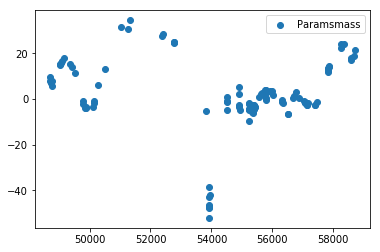

In [38]:
Parampl2 = (5.16222043e+00,  8.92238123e-01,  5.40724837e+00,  5.00595858e+04, -1.66823108e+01,  1.77721797e+01)
toc2,zoc2  = OC(Parampl2)
#plt.scatter(toc0,zoc0-taur, label="Paramssol0")
#plt.scatter(toc1,zoc1-taur, label="Paramssol1")
plt.scatter(toc2,zoc2-taur, label="Paramsmass")
plt.legend()

In [ ]:
%%time
ntotg=20
asi  = 7.1 # 76^o 7.58
#x0=resultga0.x # Param0    #Param0 = (ainc, e, w, t0, z0, P)   #parámetros iniciales
#f = open("output2.txt", "w")   #write format (w) to file output.txt
resultsim = resultga0

f = open("gridP-Mp.txt", "w")
print (*resultga0.x)
print (*resultsim.x)
for ik in range(0,ntotg+1,1):
        P    =15.5+ik*(15.5)/ntotg
        bounds1 = (0.1*Mp,2*Mp), (0.7,0.99), (0, 2*pi), (t0min,t0min+P*dy), (z0min,z0max), (0.9999*P,1.0001*P)
        resultga01 = optimize.differential_evolution(WRMS, bounds1, strategy='best1bin', maxiter=40, popsize=50,tol=0.01, mutation=(0.5, 1), recombination=0.7, seed=None, callback=None, disp=False, polish=True, init='latinhypercube', atol=0)   #disp=True si queremos ver como avanza.
#        resultsim  = optimize.minimize(WRMS, resultsim.x, method='nelder-mead', options={'xatol': 1e-8, 'disp': True})
        Params = resultga01.x
        print (P,a,*resultga01.x,resultga01.fun,ik, "\n",file=f, end=' ', sep=' ')
#        print (P,a,*resultsim.x,resultsim.fun,"\n",file=f, end=' ', sep=' ')
        print (P,a,resultga01.fun,WRMS(Params),ik,"\n",sep=' ')
        f.flush()
f.close()


22.009766799998953 0.9464968300248483 3.263820271735943 53289.82536112527 -0.3418193321784222 27.98912395035914
22.009766799998953 0.9464968300248483 3.263820271735943 53289.82536112527 -0.3418193321784222 27.98912395035914


/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [32]:
resultga0.x

array([ 2.20097668e+01,  9.46496830e-01,  3.26382027e+00,  5.32898254e+04,
       -3.41819332e-01,  2.79891240e+01])

In [25]:
#resultsim = optimize.minimize(WRMS, resultga0.x, method='nelder-mead', options={'xatol': 1e-8, 'disp': True})
resultsim.x
#print (Pmax, (max(t)-min(t))/dy)

array([9.38302959e+00, 9.32856790e-01, 3.17089423e+00, 5.30599905e+04,
       1.66289206e+01, 2.29992555e+01])

In [26]:
print (*resultsim.x,resultsim.fun)
print (*resultga0.x,resultga0.fun)

9.38302958983434 0.9328567895621869 3.170894228155362 53059.99046113527 16.628920550606182 22.999255526917317 106.76369739445624
9.38302958983434 0.9328567895621869 3.170894228155362 53059.99046113527 16.628920550606182 22.999255526917317 106.76369739445624


In [4]:
plt.scatter(t,taur)

NameError: name 'plt' is not defined

Finding optimal frequency:
 - Estimated peak width = 0.000629
 - Using 5 steps per peak; omega_step = 0.000126
 - User-specified period range:  3.6e+02 to 9.1e+03
 - Computing periods at 133 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps


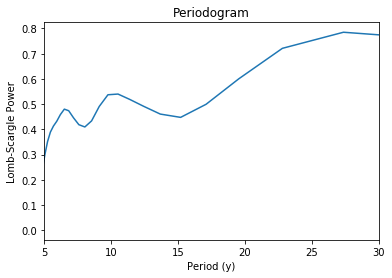

In [28]:
#Periodograma
from gatspy.periodic import LombScargleFast
from gatspy import datasets, periodic #Importo "periodic" para definir el modelo

model = periodic.LombScargleFast(fit_period=True) #Defino modelo
model.optimizer.period_range = (1.*365.25, 25.*365.25)        #Rango para buscar períodos
model.fit(t, taur, etaur)                         #Ingreso mis datos al modelo y ajusto
periods3, power3 = model.periodogram_auto()     #Obtengo resultados

#Grafico:
fig, ax = plt.subplots()
ax.plot(periods3/365.25, power3)
plt.title('Periodogram')
ax.set(xlim=(5, 30), xlabel='Period (y)', ylabel='Lomb-Scargle Power');

In [3]:
print(t[0:10],tau[0:10])


NameError: name 't' is not defined